<a href="https://colab.research.google.com/github/cristina-ap/PMP-2024/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

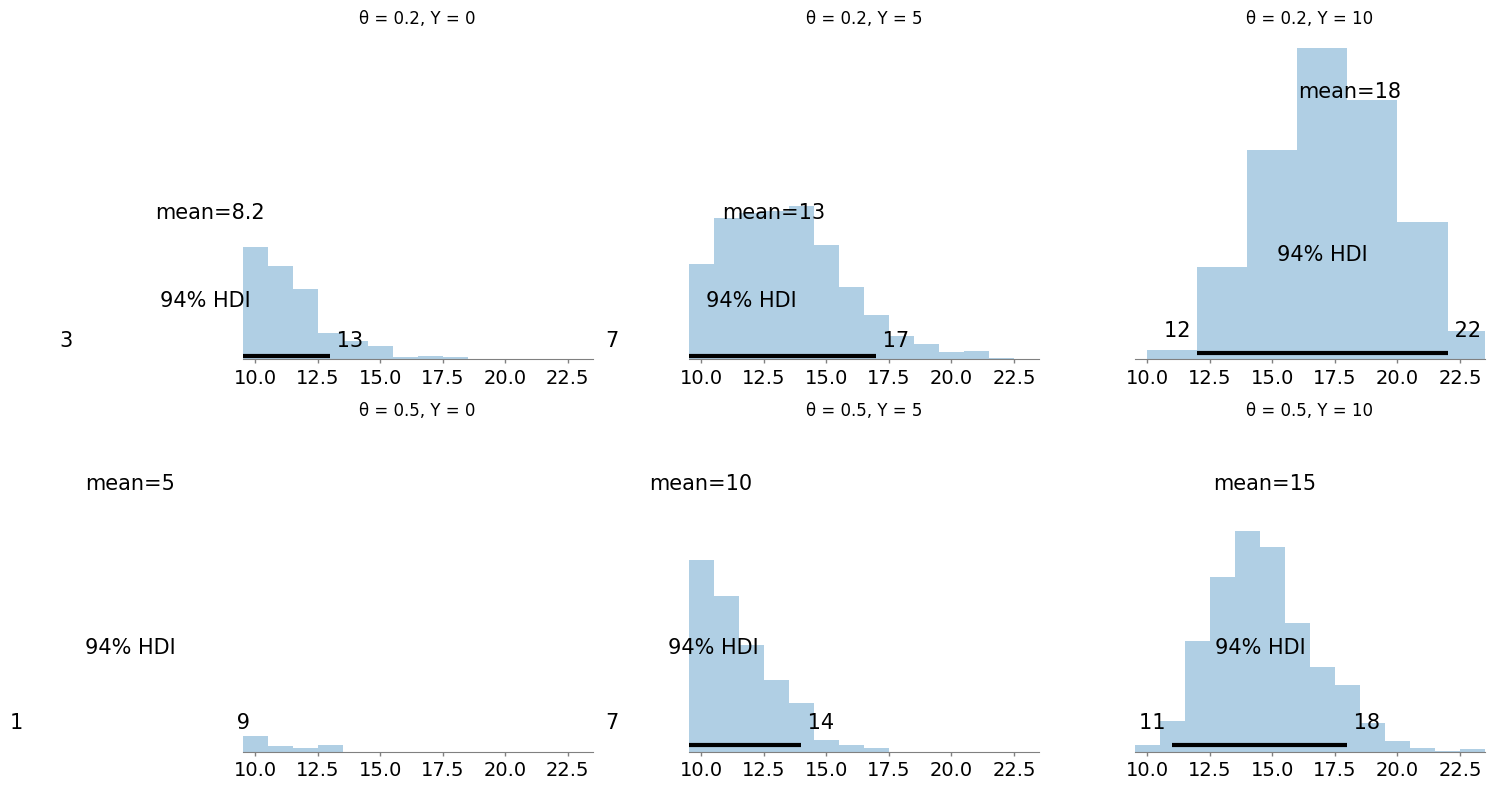

In [3]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

Y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

posterior_distributions = []

for theta in theta_values:
    for Y_obs in Y_values:
        with pm.Model() as model:

            n = pm.Poisson("n", mu=10)

            Y = pm.Binomial("Y", n=n, p=theta, observed=Y_obs)

            trace = pm.sample(1000, return_inferencedata=True, progressbar=False)
            posterior_distributions.append((theta, Y_obs, trace))

fig, axes = plt.subplots(len(theta_values), len(Y_values), figsize=(15, 8), sharex=True, sharey=True)

for i, theta in enumerate(theta_values):
    for j, Y_obs in enumerate(Y_values):
        theta, Y_obs, trace = posterior_distributions[i * len(Y_values) + j]
        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j])
        axes[i, j].set_title(f"θ = {theta}, Y = {Y_obs}")

plt.tight_layout()
plt.show()

Efectele lui Y si theta asupra distributiei a posteriori n:

  Cu cat Y este mai mare, cu atat distributia a posteriori n se deplaseaza spre valori mai mari, adica numarul total de clienti trebuie sa fie mai mare pentru a explica numarul de mare de clineti care au cumparat.

  Daca theta este mai mare, Y poate sa fie mai mic pentru a explica distributia n, adica numarul total de clineti poate sa fie mai mic deoarece au porbabilitatea mai mare de a cumpara.